## Important parameters
<br>xt_ocean: longitude, length 3600
<br>yt_ocean: latitude, length 1500
<br> [mind map](https://miro.com/app/board/o9J_lM4N1Pg=/?fromRedirect=1)

In [1]:
import netCDF4 as nc4
import keras
import xarray,numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import  Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils
from tensorflow.keras import layers

# Load data

In [2]:
import glob
input_data_split = []
for np_name in glob.glob('dataset/*.np[yz]'):
    input_data_split.append(np.load(np_name))
np.array(input_data_split).shape

(2251, 128, 128, 1)

# Randomly select 1500 samples

In [3]:
import random
n = 1500 # sample size
input_data_split = np.array(random.sample(input_data_split,n))
input_data_split.shape

(1500, 128, 128, 1)

# split train set & validation set

In [4]:
train_set, test_set = train_test_split(input_data_split, test_size=0.3333333)
train_set.shape

(1000, 128, 128, 1)

# Autoencoder

In [5]:
lat = 128 # chunk size
long = 128 # chunk size

input_img = keras.Input(shape=(lat, long,1))

x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(4, (3, 3), activation='relu',strides=(1,1), padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same')(encoded)
x = layers.Conv2DTranspose(8, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((4, 4))(x)
decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 8)       80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 4)         292       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 4)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 32, 32, 4)         148       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 8)         296   

In [6]:
history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

Epoch 1/50
32/32 [==============================] - 10s 301ms/step - loss: 0.0437 - val_loss: 0.0206
Epoch 2/50
32/32 [==============================] - 7s 206ms/step - loss: 0.0201 - val_loss: 0.0139
Epoch 3/50
32/32 [==============================] - 6s 202ms/step - loss: 0.0101 - val_loss: 0.0023
Epoch 4/50
32/32 [==============================] - 7s 208ms/step - loss: 0.0022 - val_loss: 0.0017
Epoch 5/50
32/32 [==============================] - 7s 208ms/step - loss: 0.0016 - val_loss: 0.0015
Epoch 6/50
32/32 [==============================] - 7s 207ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/50
32/32 [==============================] - 7s 217ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/50
32/32 [==============================] - 6s 203ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 9/50
32/32 [==============================] - 7s 208ms/step - loss: 0.0011 - val_loss: 9.9483e-04
Epoch 10/50
32/32 [==============================] - 7s 208ms/step - loss: 9.3674e-04 - val_los

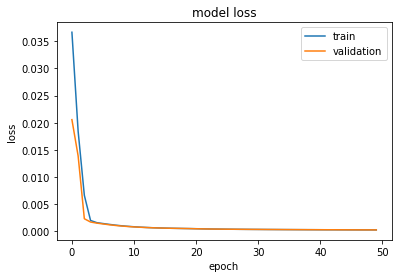

In [7]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [8]:
decoded_data = autoencoder.predict(np.array([test_set[10]]))

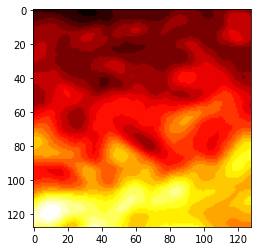

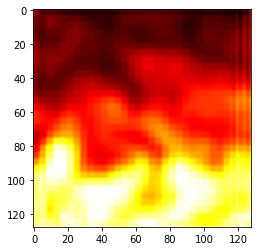

In [9]:
plt.imshow(test_set[100],cmap='hot')
plt.show()
plt.imshow(decoded_data[0,:,:,0],cmap='hot')
plt.show()

## bottleneck size 32 x 32 x n, where n = 1,2,4,8

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 128, 128, 2)       20        
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 64, 64, 2)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 64, 64, 1)         19        
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 32, 32, 1)         0         
_________________________________________________________________
conv2d_transpose_27 (Conv2DT (None, 32, 32, 1)         10        
_________________________________________________________________
conv2d_transpose_28 (Conv2DT (None, 32, 32, 2)         20  

32/32 [==============================] - 5s 150ms/step - loss: 0.0450 - val_loss: 0.0280
Epoch 2/50
32/32 [==============================] - 5s 143ms/step - loss: 0.0249 - val_loss: 0.0161
Epoch 3/50
32/32 [==============================] - 5s 144ms/step - loss: 0.0132 - val_loss: 0.0038
Epoch 4/50
32/32 [==============================] - 4s 138ms/step - loss: 0.0031 - val_loss: 0.0022
Epoch 5/50
32/32 [==============================] - 4s 137ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 6/50
32/32 [==============================] - 4s 131ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 7/50
32/32 [==============================] - 4s 139ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 8/50
32/32 [==============================] - 4s 136ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/50
32/32 [==============================] - 4s 133ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 10/50
32/32 [==============================] - 4s 133ms/step - loss: 0.0010 - val_loss: 9.6225e-04
Epoch 

32/32 [==============================] - 5s 167ms/step - loss: 9.7884e-04 - val_loss: 8.7488e-04
Epoch 7/50
32/32 [==============================] - 5s 170ms/step - loss: 8.2076e-04 - val_loss: 7.4368e-04
Epoch 8/50
32/32 [==============================] - 5s 168ms/step - loss: 7.0171e-04 - val_loss: 6.3782e-04
Epoch 9/50
32/32 [==============================] - 5s 168ms/step - loss: 6.0999e-04 - val_loss: 5.5766e-04
Epoch 10/50
32/32 [==============================] - 5s 171ms/step - loss: 5.3064e-04 - val_loss: 5.0551e-04
Epoch 11/50
32/32 [==============================] - 6s 176ms/step - loss: 4.8838e-04 - val_loss: 4.6670e-04
Epoch 12/50
32/32 [==============================] - 6s 186ms/step - loss: 4.5433e-04 - val_loss: 4.2457e-04
Epoch 13/50
32/32 [==============================] - 6s 184ms/step - loss: 4.1547e-04 - val_loss: 3.9586e-04
Epoch 14/50
32/32 [==============================] - 6s 191ms/step - loss: 3.8697e-04 - val_loss: 3.7221e-04
Epoch 15/50
32/32 [===============

32/32 [==============================] - 8s 238ms/step - loss: 4.3088e-04 - val_loss: 4.0200e-04
Epoch 11/50
32/32 [==============================] - 8s 251ms/step - loss: 3.9176e-04 - val_loss: 3.5860e-04
Epoch 12/50
32/32 [==============================] - 8s 243ms/step - loss: 3.4507e-04 - val_loss: 3.1515e-04
Epoch 13/50
32/32 [==============================] - 8s 242ms/step - loss: 3.0730e-04 - val_loss: 2.8617e-04
Epoch 14/50
32/32 [==============================] - 8s 239ms/step - loss: 2.8258e-04 - val_loss: 2.6791e-04
Epoch 15/50
32/32 [==============================] - 8s 236ms/step - loss: 2.6232e-04 - val_loss: 2.4515e-04
Epoch 16/50
32/32 [==============================] - 8s 235ms/step - loss: 2.4873e-04 - val_loss: 2.3167e-04
Epoch 17/50
32/32 [==============================] - 8s 237ms/step - loss: 2.3514e-04 - val_loss: 2.2221e-04
Epoch 18/50
32/32 [==============================] - 8s 248ms/step - loss: 2.2036e-04 - val_loss: 2.1340e-04
Epoch 19/50
32/32 [============

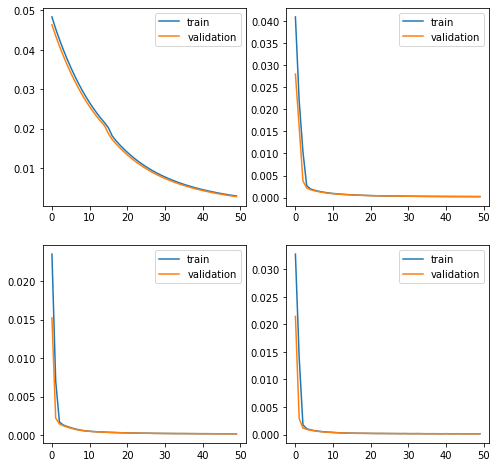

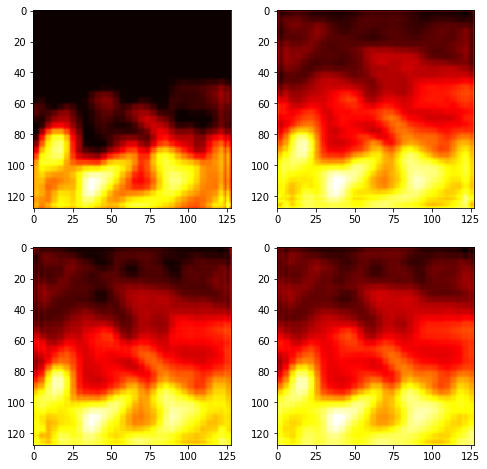

In [13]:
input_img = keras.Input(shape=(lat, long,1))

fig1 = plt.figure(figsize=(8,8)) # mse loss
fig2 = plt.figure(figsize=(8,8)) # image

for i in range(1,5):
    x = layers.Conv2D(math.pow(2,i), (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(math.pow(2,i-1), (3, 3), activation='relu',strides=(1,1), padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2DTranspose(math.pow(2,i-1), (3, 3), activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(math.pow(2,i), (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((4, 4))(x)
    decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

    decoded_data = autoencoder.predict(np.array([test_set[10]]))
    
    ax1 = fig1.add_subplot(2,2,i)
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.legend(['train', 'validation'], loc='upper right')
    
    ax2 = fig2.add_subplot(2,2,i)
    ax2.imshow(decoded_data[0,:,:,0],cmap='hot')

## bottleneck size n x n x 4, where n = 32, 16, 8 or 4

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 128, 128, 1)]     0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 128, 128, 4)       40        
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 64, 64, 4)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 64, 64, 2)         74        
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 32, 32, 2)         0         
_________________________________________________________________
conv2d_transpose_39 (Conv2DT (None, 32, 32, 2)         38        
_________________________________________________________________
conv2d_transpose_40 (Conv2DT (None, 32, 32, 4)         76 

32/32 [==============================] - 5s 127ms/step - loss: 0.0458 - val_loss: 0.0243
Epoch 2/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0199 - val_loss: 0.0157
Epoch 3/50
32/32 [==============================] - 4s 122ms/step - loss: 0.0149 - val_loss: 0.0119
Epoch 4/50
32/32 [==============================] - 4s 127ms/step - loss: 0.0109 - val_loss: 0.0084
Epoch 5/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0077 - val_loss: 0.0051
Epoch 6/50
32/32 [==============================] - 4s 126ms/step - loss: 0.0044 - val_loss: 0.0029
Epoch 7/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0027 - val_loss: 0.0024
Epoch 8/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 9/50
32/32 [==============================] - 4s 126ms/step - loss: 0.0020 - val_loss: 0.0019
Epoch 10/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 11/5

Epoch 8/50
32/32 [==============================] - 4s 122ms/step - loss: 0.0067 - val_loss: 0.0063
Epoch 9/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0061 - val_loss: 0.0056
Epoch 10/50
32/32 [==============================] - 4s 127ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 11/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0048 - val_loss: 0.0045
Epoch 12/50
32/32 [==============================] - 4s 128ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 13/50
32/32 [==============================] - 4s 123ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 14/50
32/32 [==============================] - 4s 128ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 15/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0034 - val_loss: 0.0033
Epoch 16/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0033 - val_loss: 0.0033
Epoch 17/50
32/32 [==============================] - 4s 126ms/step - loss: 0.0033 - val_loss:

32/32 [==============================] - 4s 124ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 17/50
32/32 [==============================] - 4s 124ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 18/50
32/32 [==============================] - 4s 120ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 19/50
32/32 [==============================] - 4s 120ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 20/50
32/32 [==============================] - 4s 119ms/step - loss: 0.0039 - val_loss: 0.0040
Epoch 21/50
32/32 [==============================] - 4s 121ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 22/50
32/32 [==============================] - 4s 127ms/step - loss: 0.0039 - val_loss: 0.0039
Epoch 23/50
32/32 [==============================] - 4s 121ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 24/50
32/32 [==============================] - 4s 122ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 25/50
32/32 [==============================] - 4s 125ms/step - loss: 0.0038 - val_loss: 0.0039
Ep

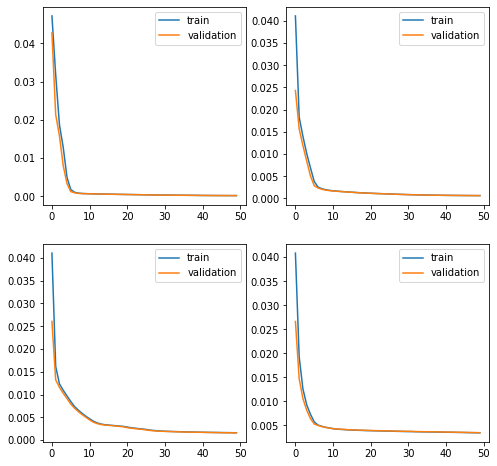

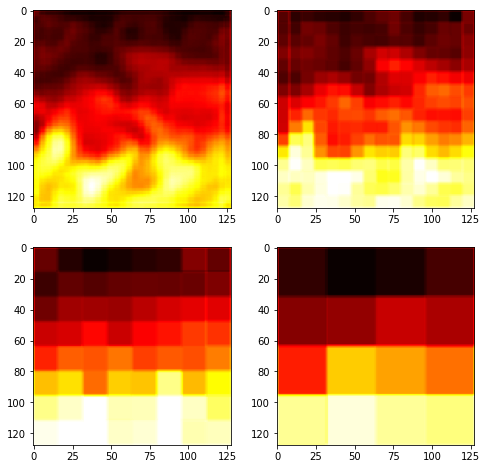

In [14]:
fig3 = plt.figure(figsize=(8,8)) # mse loss
fig4 = plt.figure(figsize=(8,8)) # image

for i in range(1,5):
    x = layers.Conv2D(4, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(2, (3, 3), activation='relu',strides=(1,1), padding='same')(x)
    encoded = layers.MaxPooling2D((int(math.pow(2,i)),int(math.pow(2,i))), padding='same')(x)

    x = layers.Conv2DTranspose(2, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.Conv2DTranspose(4, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((int(math.pow(2,i+1)),int(math.pow(2,i+1))))(x)
    decoded = layers.Conv2DTranspose(1, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = keras.Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='mse')
    autoencoder.summary()
    
    history = autoencoder.fit(train_set, train_set,
                epochs=50, validation_data=(test_set, test_set))

    decoded_data = autoencoder.predict(np.array([test_set[10]]))
    
    ax1 = fig3.add_subplot(2,2,i)
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.legend(['train', 'validation'], loc='upper right')
    
    ax2 = fig4.add_subplot(2,2,i) 
    ax2.imshow(decoded_data[0,:,:,0],cmap='hot')

In [12]:
# aaa

# aaa